In [0]:
!git clone https://github.com/phuockhanhle/SY09_pokemon.git

Cloning into 'SY09_pokemon'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 84 (delta 21), reused 65 (delta 9), pack-reused 0
Unpacking objects: 100% (84/84), done.


In [0]:
%cd SY09_pokemon

/content/SY09_pokemon


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("presenation/traiteQuali_diff.csv")
df = df.drop(columns='Unnamed: 0')
X = df.drop(columns = 'winner')
df.loc[df['winner']=='t','winner']=1
df.loc[df['winner']=='f','winner']=0
y = df['winner']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


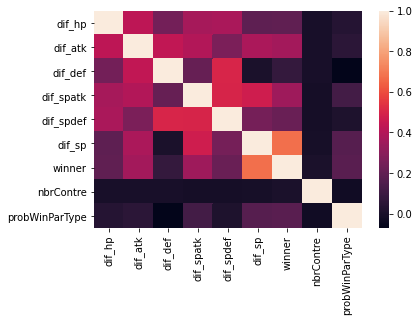

In [0]:
corr = df.corr()
sns.heatmap(corr)

In [0]:
corr

,dif_hp,dif_atk,dif_def,dif_spatk,dif_spdef,dif_sp,winner,nbrContre,probWinParType
dif_hp,1.000000,0.428312,0.244575,0.369902,0.377136,0.188492,0.194240,-0.003027,0.035259
dif_atk,0.428312,1.000000,0.439376,0.401250,0.267576,0.383405,0.361873,-0.001853,0.052006
dif_def,0.244575,0.439376,1.000000,0.210207,0.505356,0.005151,0.079377,-0.002090,-0.070978
dif_spatk,0.369902,0.401250,0.210207,1.000000,0.499986,0.475017,0.348891,-0.009020,0.118556
dif_spdef,0.377136,0.267576,0.505356,0.499986,1.000000,0.251027,0.218823,-0.009815,0.016364
dif_sp,0.188492,0.383405,0.005151,0.475017,0.251027,1.000000,0.677719,-0.004749,0.168766
winner,0.194240,0.361873,0.079377,0.348891,0.218823,0.677719,1.000000,0.004338,0.177434
nbrContre,-0.003027,-0.001853,-0.002090,-0.009020,-0.009815,-0.004749,0.004338,1.000000,-0.021343
probWinParType,0.035259,0.052006,-0.070978,0.118556,0.016364,0.168766,0.177434,-0.021343,1.000000


la correlation entre (dif_sp,winner) (dif_def,dif_spdef)

In [0]:
df

,dif_hp,dif_atk,dif_def,dif_spatk,dif_spdef,dif_sp,winner,nbrContre,probWinParType
0,-20,-6,10,-15,10,-19,0,482.0,0.431535
1,0,-39,-18,18,39,0,0,482.0,0.568465
2,-20,-35,10,-45,10,0,0,138.0,0.268116
3,-37,-80,-50,10,-50,-28,0,252.0,0.432540
4,50,50,-105,105,-160,50,1,487.0,0.542094
...,...,...,...,...,...,...,...,...,...
49995,70,80,30,80,95,30,1,584.0,0.715753
49996,25,30,0,-15,5,8,1,218.0,0.903670
49997,-13,-65,40,25,10,-25,0,1702.0,0.394242
49998,15,-5,-20,-40,0,55,1,134.0,1.000000


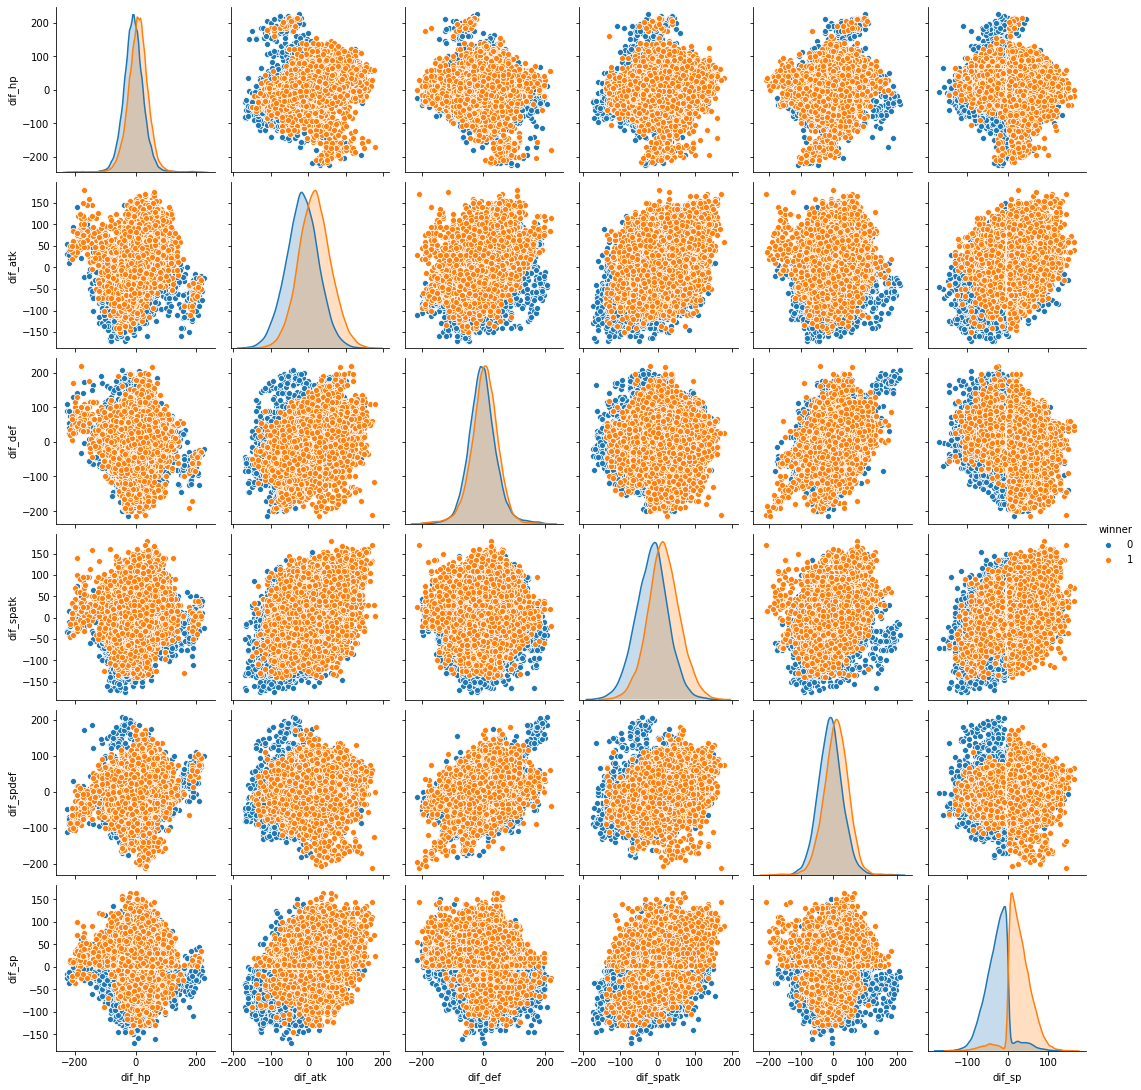

In [0]:
sns.pairplot(df,vars=["dif_hp","dif_atk","dif_def","dif_spatk","dif_spdef","dif_sp"],hue="winner")

par le graph, on peut voir que :
il y a un peu correlation lineaire entre des differences de stats
des couples ont correlation lineair (dif_spatk,def_spdef),(def_spdef,dif_def),(dif_spatk,dif_atk) (dif_spatk,dif_sp)


stats de dif_atk et dif_spatk influnce un peu sur resultat

stats de dif_sp motre parfaire le resultat

In [0]:
def centrer(df):
  from statistics import mean
  from statistics import stdev
  cols = df.columns
  for i in cols:
    df[i] = (df[i]-mean(df[i]))/stdev(df[i])

In [0]:
from sklearn.decomposition import PCA


In [0]:
X['nbrContre'] = X['nbrContre']-mean(X['nbrContre'])/stdev(X['nbrContre'])

In [0]:
pca = PCA(n_components=X.shape[1])
pcs = pca.fit_transform(X)

In [0]:
pca.explained_variance_ratio_

array([9.29762975e-01, 3.23417006e-02, 1.35341116e-02, 9.46603921e-03,
       6.62690881e-03, 5.12104307e-03, 3.14700920e-03, 2.12793104e-07])

<BarContainer object of 8 artists>

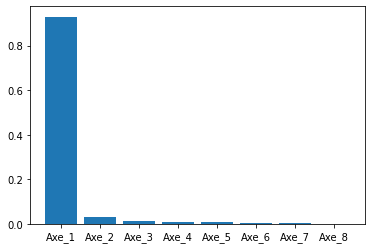

In [0]:
plt.bar(["Axe_"+str(i+1) for i in range(len(pca.explained_variance_ratio_))],pca.explained_variance_ratio_)

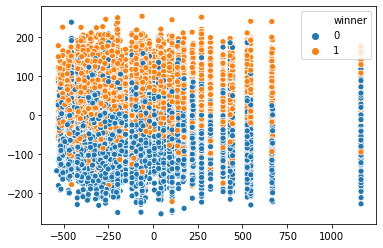

In [0]:
sns.scatterplot(x=pcs[:,0],y=pcs[:,1],hue=y)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
cls =LogisticRegression()
cls.fit(pcs[:,0:2],y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from src.utils import add_decision_boundary

In [0]:
cls.coef_

array([[3.01051525e-05, 1.64932810e-02]])

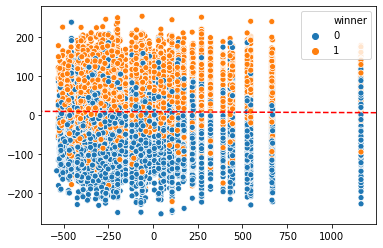

In [0]:
sns.scatterplot(x=pcs[:,0],y=pcs[:,1],hue=y)
add_decision_boundary(cls)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly = PolynomialFeatures(degree=2)
cls2 = LogisticRegression()
pipe = make_pipeline(poly,cls2)
pipe.fit(pcs[:,0:2],y) 

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

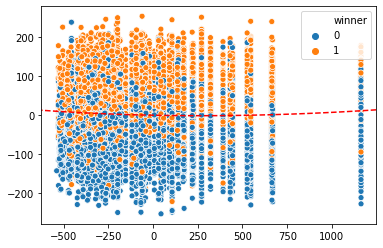

In [0]:
sns.scatterplot(x=pcs[:,0],y=pcs[:,1],hue=y)
add_decision_boundary(pipe)

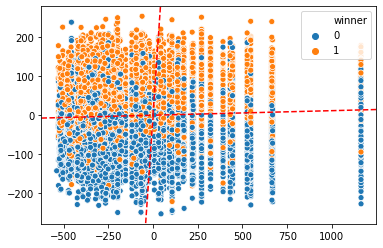

In [0]:
poly = PolynomialFeatures(degree=10)
cls2 = LogisticRegression()
pipe = make_pipeline(poly,cls2)
pipe.fit(pcs[:,0:2],y) 
sns.scatterplot(x=pcs[:,0],y=pcs[:,1],hue=y)
add_decision_boundary(pipe)

In [0]:
pca.explained_variance_

array([1.42873283e+05, 4.96983108e+03, 2.07973753e+03, 1.45461169e+03,
       1.01833289e+03, 7.86931995e+02, 4.83589416e+02, 3.26991396e-02])

In [0]:
pca.components_

array([[-2.99083896e-04, -2.46224224e-04, -2.63360943e-04,
        -1.13256010e-03, -1.04809746e-03, -5.37930871e-04,
         9.99998555e-01, -1.04255220e-05],
       [ 2.98080147e-01,  4.99707439e-01,  3.83796386e-01,
         5.03557293e-01,  3.91361524e-01,  3.27727082e-01,
         1.47006076e-03,  2.09231337e-04],
       [-2.74223314e-02, -6.71712256e-02, -7.01847024e-01,
         3.82030009e-01, -1.74548929e-01,  5.70729286e-01,
         3.47168592e-04,  7.08430173e-04],
       [ 4.77656085e-02,  7.22498098e-01, -2.90325049e-02,
        -3.89281921e-01, -5.50096323e-01,  1.43962171e-01,
        -7.55462155e-04,  5.20261195e-05],
       [-7.74795082e-01, -5.69561138e-02,  3.56502395e-01,
        -1.28599533e-01,  6.07304157e-02,  4.99127828e-01,
         3.46382016e-05,  1.04528774e-04],
       [-4.37846198e-01,  1.89703033e-01,  4.45832641e-02,
         6.35490153e-01, -3.66933461e-01, -4.81485090e-01,
         3.64044101e-06, -8.24650192e-05],
       [-3.40731398e-01,  4.295878

In [0]:
df = pd.read_csv("presenation/Original.csv")

In [0]:
df

,p1_id,p1_name,p1_type1,p1_type2,p1_hp,p1_atk,p1_def,p1_spatk,p1_spdef,p1_sp,p1_gen,p1_legen,p2_id,p2_name,p2_type1,p2_type2,p2_hp,p2_atk,p2_def,p2_spatk,p2_spdef,p2_sp,p2_gen,p2_legen,winner
0,266,Larvitar,Rock,Ground,50,64,50,45,50,41,2,f,298,Nuzleaf,Grass,Dark,70,70,40,60,40,60,3,f,f
1,702,Virizion,Grass,Fighting,91,90,72,90,129,108,5,t,701,Terrakion,Rock,Fighting,91,129,90,72,90,108,5,t,f
2,191,Togetic,Fairy,Flying,55,40,85,80,105,40,2,f,668,Beheeyem,Psychic,NaN,75,75,75,125,95,40,5,f,f
3,237,Slugma,Fire,NaN,40,40,40,70,40,20,2,f,683,Druddigon,Dragon,NaN,77,120,90,60,90,48,5,f,f
4,151,Omastar,Rock,Water,70,60,125,115,70,55,1,f,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,f,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,Reshiram,Dragon,Fire,100,120,100,150,120,90,5,t,126,Horsea,Water,NaN,30,40,70,70,25,60,1,f,t
49996,589,Drilbur,Ground,NaN,60,85,40,30,45,68,5,f,664,Tynamo,Electric,NaN,35,55,40,45,40,60,5,f,t
49997,303,Pelipper,Water,Flying,60,50,100,85,70,65,3,f,368,Zangoose,Normal,NaN,73,115,60,60,60,90,3,f,f
49998,109,Voltorb,Electric,NaN,40,30,50,55,55,100,1,f,89,Magnemite,Electric,Steel,25,35,70,95,55,45,1,f,t


In [0]:
X_sansDiff = df[['p1_hp','p1_atk','p1_def','p1_spatk','p1_spdef','p1_sp',
                 'p2_hp','p2_atk','p2_def','p2_spatk','p2_spdef','p2_sp']]
X_sansDiff

,p1_hp,p1_atk,p1_def,p1_spatk,p1_spdef,p1_sp,p2_hp,p2_atk,p2_def,p2_spatk,p2_spdef,p2_sp
0,50,64,50,45,50,41,70,70,40,60,40,60
1,91,90,72,90,129,108,91,129,90,72,90,108
2,55,40,85,80,105,40,75,75,75,125,95,40
3,40,40,40,70,40,20,77,120,90,60,90,48
4,70,60,125,115,70,55,20,10,230,10,230,5
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,100,120,100,150,120,90,30,40,70,70,25,60
49996,60,85,40,30,45,68,35,55,40,45,40,60
49997,60,50,100,85,70,65,73,115,60,60,60,90
49998,40,30,50,55,55,100,25,35,70,95,55,45


In [0]:
X_avecDiff = df[["dif_hp","dif_atk","dif_def","dif_spatk","dif_spdef","dif_sp"]]

In [0]:
X_avecDiff

,dif_hp,dif_atk,dif_def,dif_spatk,dif_spdef,dif_sp
0,-20,-6,10,-15,10,-19
1,0,-39,-18,18,39,0
2,-20,-35,10,-45,10,0
3,-37,-80,-50,10,-50,-28
4,50,50,-105,105,-160,50
...,...,...,...,...,...,...
49995,70,80,30,80,95,30
49996,25,30,0,-15,5,8
49997,-13,-65,40,25,10,-25
49998,15,-5,-20,-40,0,55


In [0]:
trans = np.array([[1,0,0,0,0,0],
                  [0,1,0,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,0,1,0,0],
                  [0,0,0,0,1,0],
                  [0,0,0,0,0,1],
                  [-1,0,0,0,0,0],
                  [0,-1,0,0,0,0],
                  [0,0,-1,0,0,0],
                  [0,0,0,-1,0,0],
                  [0,0,0,0,-1,0],
                  [0,0,0,0,0,-1],])

In [38]:
X_sansDiff.to_numpy().dot(trans)

array([[-20,  -6,  10, -15,  10, -19],
       [  0, -39, -18,  18,  39,   0],
       [-20, -35,  10, -45,  10,   0],
       ...,
       [-13, -65,  40,  25,  10, -25],
       [ 15,  -5, -20, -40,   0,  55],
       [  8,  24,  28, 124,  80,  65]])

La méthode d’analyse factorielle que nous allons utiliser ici est l’analyse en composantes principales. L’ACP
est une technique permettant de modifier la représentation des données à l’aide d’une combinaison linéaire des variables existantes. Deux raisons à cela : il s’agit de la méthode la mieux étudiée dans le cadre de l’UV,
et elle est adaptée aux données disponibles. En effet, les variables quantitatives décrivent une représentation euclidienne des points dans un espace de dimension R12, correspondant aux quatre 12 quantitatives. Le but de l’étude est de déterminer la valeur de winner (qui est un variable categorial )


L’ACP nécessite tout d’abord d’obtenir la matrice de
corrélation des trois variables quantitatives restantes,
puis de calculer ses valeurs et vecteurs propres. On utilise le module de calcule PCA de sklearn 

<BarContainer object of 12 artists>

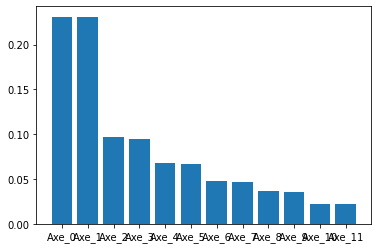

In [41]:
pca_sansDiff = PCA(n_components=X_sansDiff.shape[1])
pcs_sansDiff = pca_sansDiff.fit_transform(X_sansDiff)
plt.bar(["Axe_"+str(i) for i in range(pca_sansDiff.n_components)],pca_sansDiff.explained_variance_ratio_)

<BarContainer object of 6 artists>

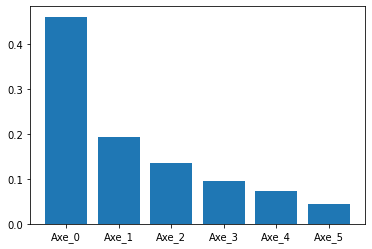

In [43]:
pca_avecDiff = PCA(n_components=X_avecDiff.shape[1])
pcs_avecDiff = pca_avecDiff.fit_transform(X_avecDiff)
plt.bar(["Axe_"+str(i) for i in range(pca_avecDiff.n_components)],pca_avecDiff.explained_variance_ratio_)

In [44]:
pca_sansDiff.explained_variance_

array([2491.66912476, 2484.35262727, 1041.59864599, 1025.68735647,
        733.9982003 ,  721.73365709,  512.09526911,  506.02651557,
        401.48668361,  387.69010599,  242.23882997,  238.43922386])

In [45]:
pca_avecDiff.explained_variance_

array([4970.12888983, 2079.75345433, 1454.69239172, 1018.33304627,
        786.93199199,  483.59460697])

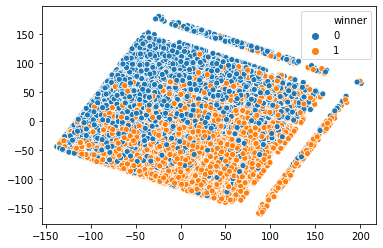

In [46]:
sns.scatterplot(x=pcs_sansDiff[:,0],y=pcs_sansDiff[:,1],hue=y)

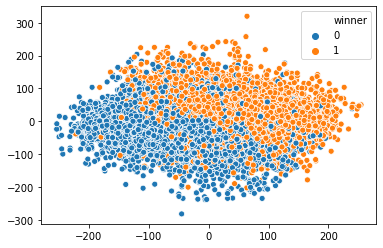

In [47]:
sns.scatterplot(x=pcs_avecDiff[:,0],y=pcs_avecDiff[:,1],hue=y)

In [58]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(pcs_avecDiff[:,0:2],list(y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

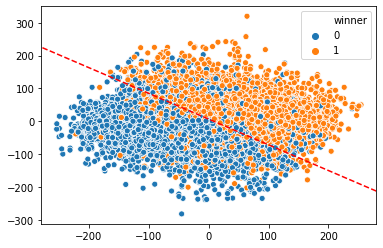

In [59]:
from src.utils import add_decision_boundary
sns.scatterplot(x=pcs_avecDiff[:,0],y=pcs_avecDiff[:,1],hue=y)
add_decision_boundary(cls)

In [60]:
cls.coef_

array([[0.0207983 , 0.02658717]])

In [61]:
cls.intercept_

array([-0.1827844])

la figure montre bien le fait que le premier plan porte la grande majorite de la variance car on peut assez bien diviser les deux classes par une ligne 0.0207983 * x +  0.02658717 * y -0.1827844 = 0

In [0]:
cumsum_sansDiff = np.cumsum(pca_sansDiff.explained_variance_ratio_)
cumsum_avecDiff = np.cumsum(pca_avecDiff.explained_variance_ratio_)

on trouve que le premiere plan de representation avec Differance de stat est plus performance et prendre plus information de celle de representation sans Differance de stat

In [50]:
cumsum_sansDiff

array([0.2309878 , 0.46129733, 0.55785773, 0.65294309, 0.72098769,
       0.78789532, 0.83536862, 0.88227932, 0.91949876, 0.9554392 ,
       0.97789572, 1.        ])

In [0]:
cum

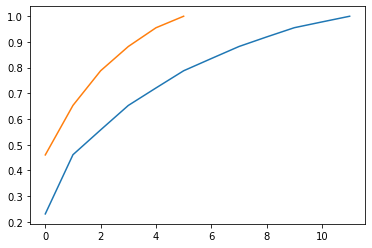

In [54]:
sns.lineplot(x =range(12),y=cumsum_sansDiff)
sns.lineplot(x =range(6),y=cumsum_avecDiff)

De là, on peut prouver que la facon de representation par difference de stat performe mieux

 Les données peuvent donc être dé-
crites de manière assez précise en utilisant uniquement
le premier axe factoriel, même en omettant les variables
qualitatives

In [0]:
n = X_avecDiff.shape[0]
p = X_avecDiff.shape[1]
eigval = (n-1)/n*pca_avecDiff.explained_variance_

In [0]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [0]:
#contributions aux axes
ctr = pcs_avecDiff**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

In [72]:
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = pca_avecDiff.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)


[[ 21.01368968  -1.2511714    1.82275298 -24.72451835 -12.28247492
   -7.49287391]
 [ 35.22650379  -3.06566115  27.55646696  -1.81733122   5.32156802
    9.4471274 ]
 [ 27.05568634 -32.00738939  -1.1079778   11.37632849   1.25064751
  -10.55058618]
 [ 35.50181919  17.42249945 -14.84537205  -4.10389995  17.82677478
   -3.71638926]
 [ 27.59222196  -7.95887949 -20.98095588   1.9378394  -10.29323223
   13.47389002]
 [ 23.10471212  26.02667719   5.49261343  15.92765246 -13.50664018
   -5.61439482]]


In [73]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X_avecDiff.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()


In [76]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':X_avecDiff.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

          id       COS2_1       COS2_2
0     dif_hp   441.575154     1.565430
1    dif_atk  1240.906569     9.398278
2    dif_def   732.010163  1024.472976
3  dif_spatk  1260.379166   303.543487
4  dif_spdef   761.330713    63.343763
5     dif_sp   533.827722   677.387925


In [79]:
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':X_avecDiff.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

          id         CTR_1         CTR_2
0     dif_hp  3.596895e-09  1.740300e-10
1    dif_atk  1.010793e-08  1.044814e-09
2    dif_def  5.962662e-09  1.138914e-07
3  dif_spatk  1.026655e-08  3.374515e-08
4  dif_spdef  6.201496e-09  7.041973e-09
5     dif_sp  4.348347e-09  7.530572e-08


In [0]:
a = pd.DataFrame({'id':X_avecDiff.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]})

In [0]:
a.to_csv('Contribute_var_axe')

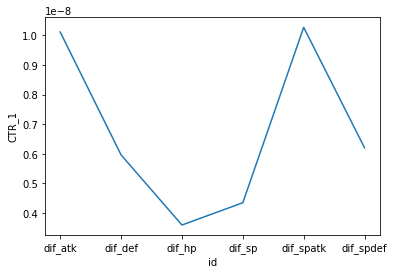

In [84]:
sns.lineplot(x=a.id,y=a.CTR_1)

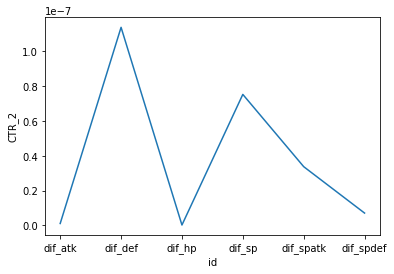

In [85]:
sns.lineplot(x=a.id,y=a.CTR_2)

la figure nous donne que la variable dif_def,dif_sp,dif_spatk contribute princialement au premier
plan factoriel, et en particulier au deuxieme axe factoriel. on peut voir dans la graphe de pair que la dif_sp et def_spatk nous donne bien separation de resultat d'un combat. En revanche, le dif_def ne donne pas clairement la separation. La combinaision entre dif_sp et dif_spatk nous donne une representation bien separer